### 51 - Support Vector Machine/Support Vector Classifier
Today we will be implementing a simple SVC using python.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [4]:
#helper function
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    #Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    #plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [5]:
df = pd.read_csv('mouse_viral_study.csv')

In [6]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [7]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

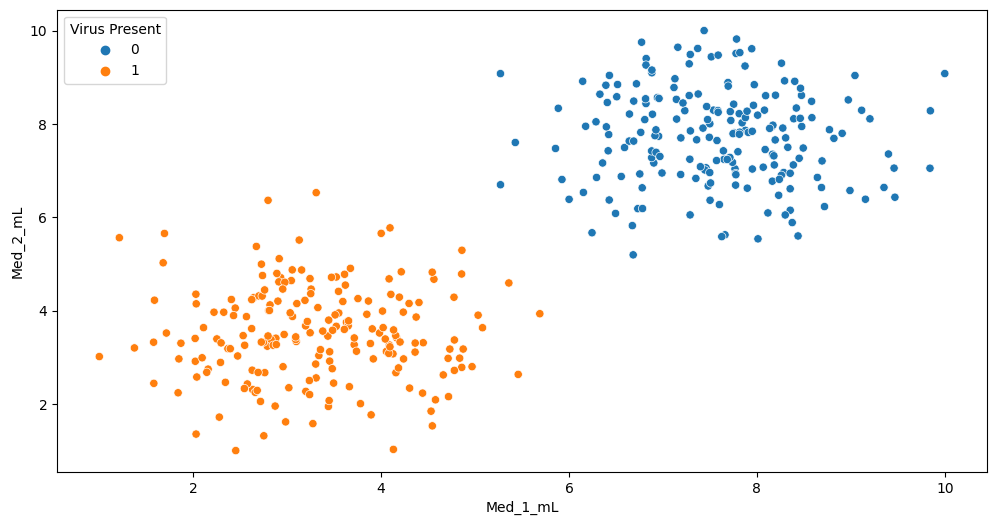

In [9]:
#Lets explore the classes using scatterplots
plt.figure(figsize=(12,6))
sns.scatterplot(x='Med_1_mL',  y='Med_2_mL', hue='Virus Present', data=df)

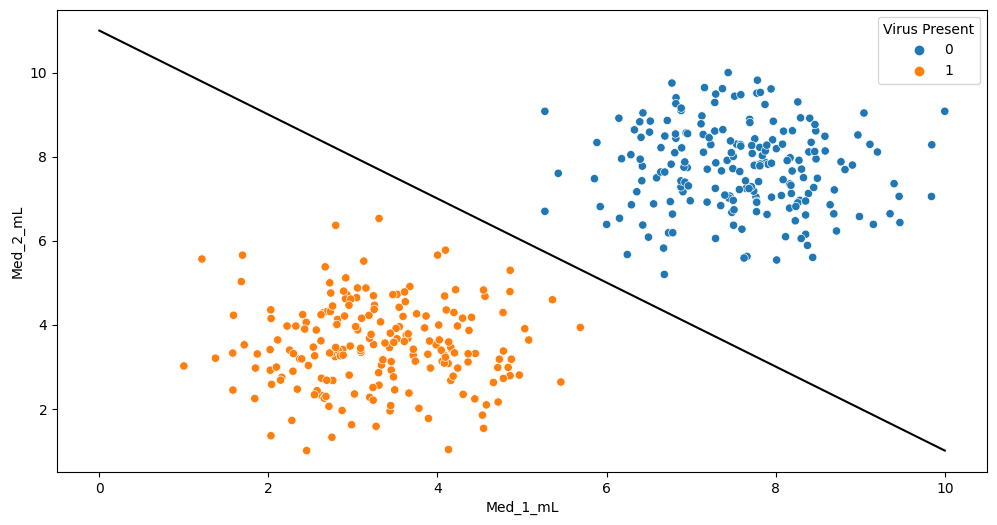

In [10]:
#Lets explore the classes using scatterplots
plt.figure(figsize=(12,6))
sns.scatterplot(x='Med_1_mL',  y='Med_2_mL', hue='Virus Present', data=df)
#plot hyperplane
x = np.linspace(0, 10 ,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y, 'black')

In [11]:
#create a support vector classifier/machine
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [12]:
y = df['Virus Present']

In [13]:
X = df.drop('Virus Present', axis=1)

In [14]:
#create the SVC model
model = SVC(kernel='linear', C=1000)

In [15]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


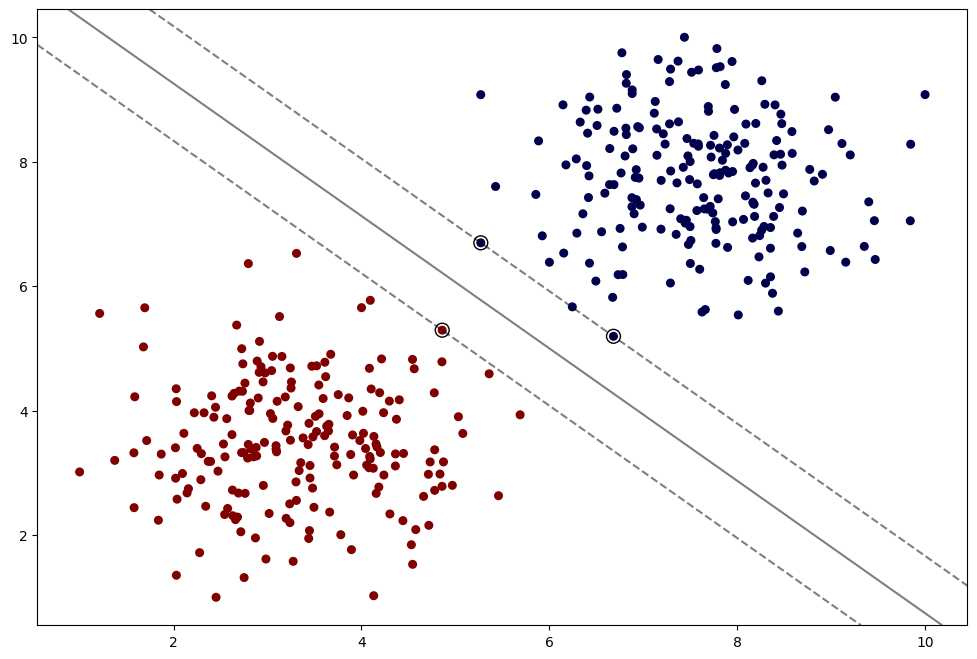

In [16]:
#plot the SVM using the helper plot
plt.figure(figsize=(12,8))
plot_svm_boundary(model, X, y)

### Part 2 - Exploring more SVM models and hyperparameters

In [17]:
model = SVC(kernel='linear', C=0.05)

In [18]:
#fit the new model with low c value
model.fit(X,y)

SVC(C=0.05, kernel='linear')

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


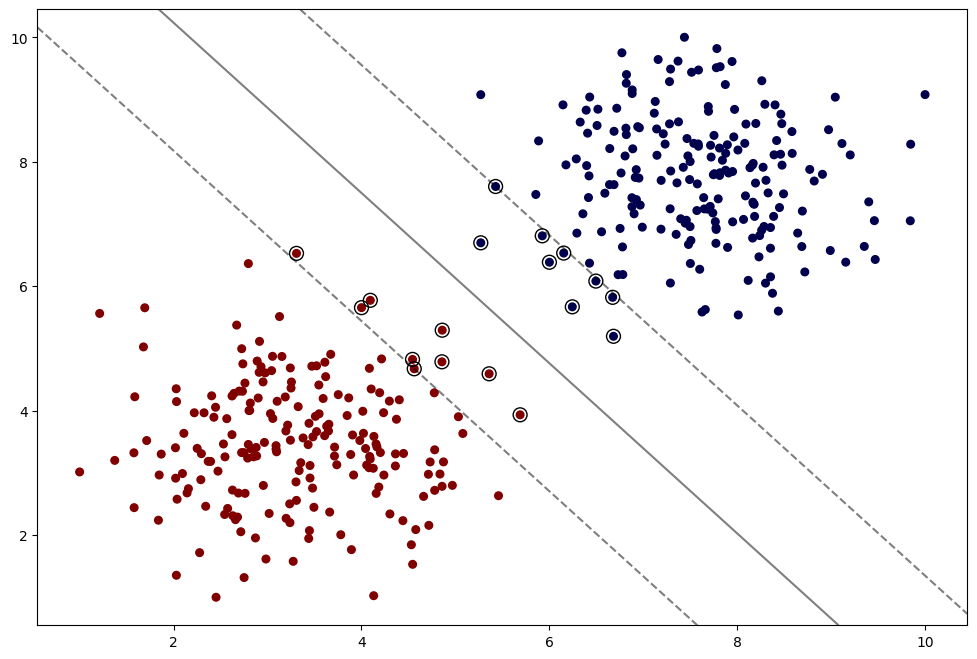

In [19]:
plt.figure(figsize=(12,8))
plot_svm_boundary(model, X, y)

In [20]:
#create new model with RBF kernel
model_RBF = SVC(kernel='rbf',C=1)

In [21]:
model_RBF.fit(X, y)

SVC(C=1)

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


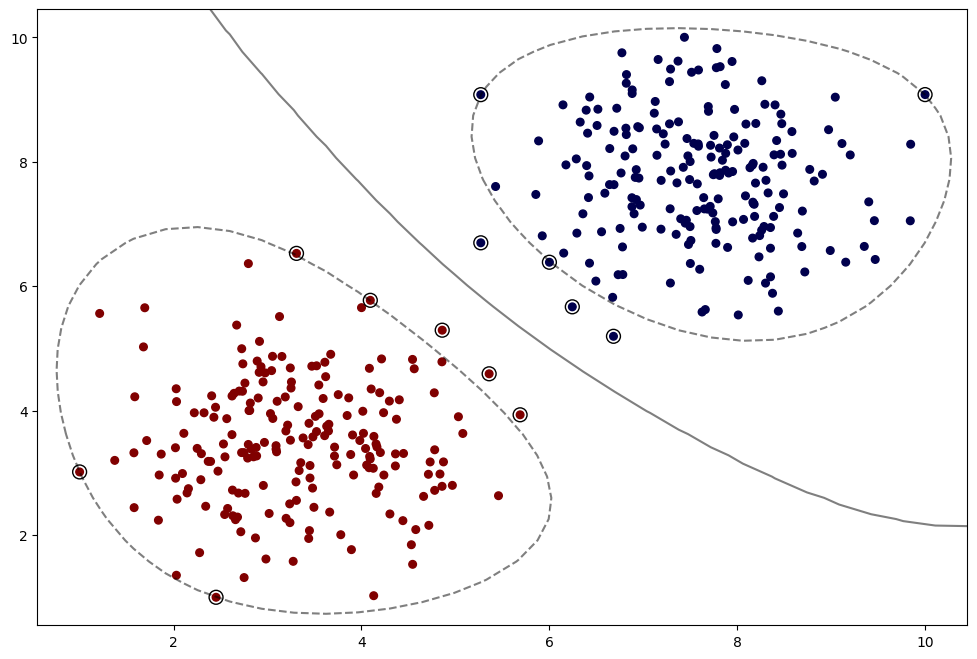

In [22]:
plt.figure(figsize=(12,8))
plot_svm_boundary(model_RBF, X, y)

In [23]:
#create a new RBF model with gamma parameter
model_RBF2 = SVC(kernel='rbf',C=1, gamma=0.9)

In [24]:
model_RBF2.fit(X, y)

SVC(C=1, gamma=0.9)

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


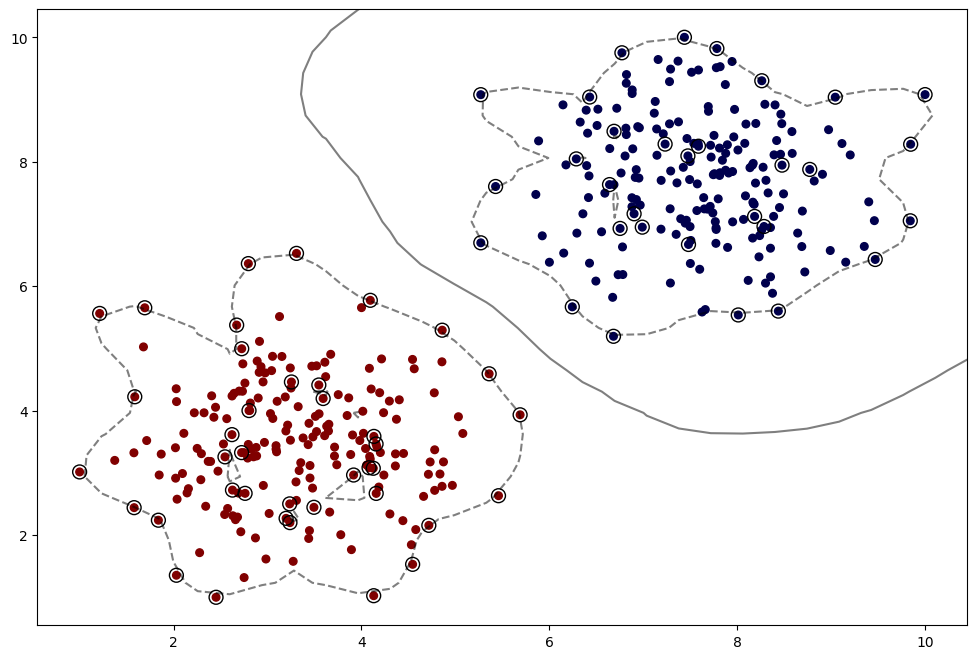

In [25]:
plt.figure(figsize=(12,8))
plot_svm_boundary(model_RBF2, X, y)

Exploring the sigmoid kernel 

In [26]:
model_sig = SVC(kernel='sigmoid')
model_sig.fit(X, y)

SVC(kernel='sigmoid')

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


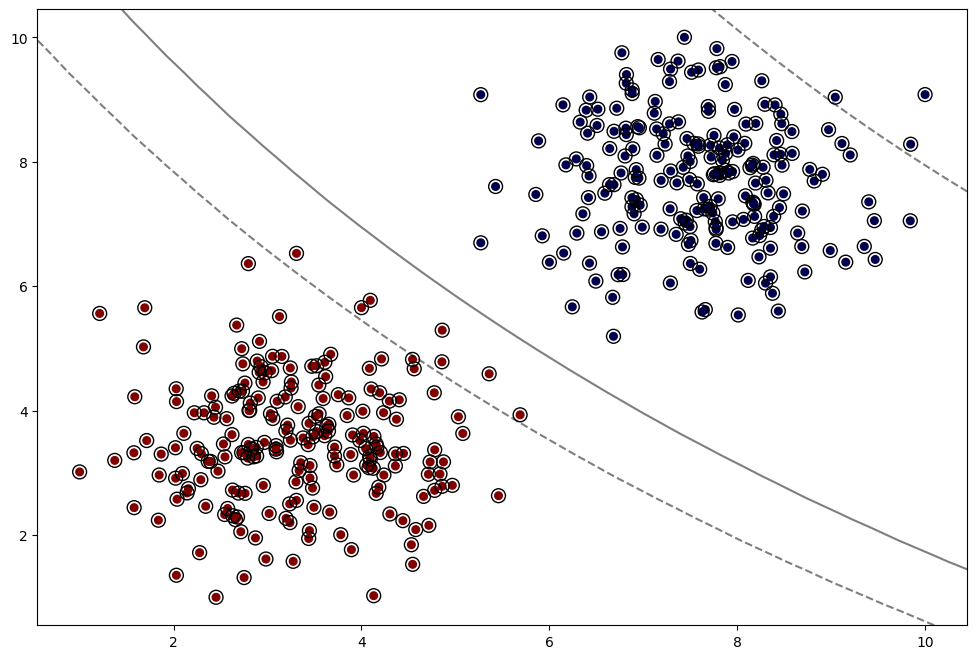

In [27]:
plt.figure(figsize=(12,8))
plot_svm_boundary(model_sig, X, y)

### Implementing Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [30]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [31]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [32]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}